# Wearable Stress And Affect Detection

### The WESAD (Wearable Stress and Affect Detection) repository is a comprehensive dataset and resource designed for research in stress and affect detection using wearable devices. It includes multimodal data collected from single subject, featuring physiological signals such as ECG, EDA, EMG, respiration, and temperature, along with accelerometer data. The dataset captures three states: baseline, stress, and amusement, induced through standardized tasks. WESAD is widely used for developing and evaluating machine learning models aimed at detecting stress and emotional states, leveraging the rich, real-world data from wearable sensors. The repository supports advancements in affective computing and personalized health monitoring.

### Objective

#### The objective of the WESAD (Wearable Stress and Affect Detection) dataset is to provide a platform for researchers to study and develop algorithms for detecting stress and different affective states (like neutral, stress, and amusement) using data collected from wearable physiological sensors, primarily focusing on the ability to identify these states through multimodal data from both chest and wrist-mounted devices like ECG, EDA, respiration, and acceleration, allowing for real-world stress detection research based on wearable technology. WESAD is commonly used to develop machine learning models for stress detection, emotion recognition, and investigating the relationship between physiological signals and emotional states. 

## Data Pre - Processiing

##### Initial stages of handling given dataset so that building and other function of ML model works smoothly 

In [1]:
import os
import pandas as pd
import zipfile
from matplotlib import pyplot as plt


# Path to your ZIP file
zip_file_path = r"C:\Users\VARKEY JOSHY T\Desktop\WESAD\S8\S8_E4_Data.zip"

# Temporary folder to extract files
extract_folder = "extracted_files"

# Create a folder for extraction if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extract ZIP file
with zipfile.ZipFile(r"C:\Users\VARKEY JOSHY T\Desktop\WESAD\S8\S8_E4_Data.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List of expected CSV files in the ZIP
csv_files = ['ACC.csv', 'HR.csv', 'EDA.csv', 'BVP.csv', 'IBI.csv', 'TEMP.csv']

# Initialize a list to store DataFrames
data_frames = []
# Read and store each CSV file
for csv_file in csv_files:
    file_path = os.path.join(extract_folder, csv_file)
    if os.path.exists(file_path):  # Check if the file exists in the extracted folder
        temp_data = pd.read_csv(file_path)

        # Replace column names with the file name prefix
        file_name_without_extension = os.path.splitext(csv_file)[0]
        temp_data.columns = [f"{file_name_without_extension}_{col}" for col in temp_data.columns]

        data_frames.append(temp_data)
    else:
        print(f"Warning: {csv_file} not found in the extracted folder.")

# Combine all DataFrames side by side
merged_data = pd.concat(data_frames, axis=1)

# Display the combined table
display(merged_data) 

# Save the combined data to a CSV file
output_file = "S8_E4.csv"
merged_data.to_csv(output_file, index=False)

print(f"CSV files combined successfully into '{output_file}'")

ACC_1499685040.000000  ACC_ 1499685040.000000  \
0                        32.0                    32.0   
1                       -16.0                     3.0   
2                       -16.0                     3.0   
3                       -16.0                     4.0   
4                       -16.0                     4.0   
...                       ...                     ...   
424860                    NaN                     NaN   
424861                    NaN                     NaN   
424862                    NaN                     NaN   
424863                    NaN                     NaN   
424864                    NaN                     NaN   

        ACC_ 1499685040.000000.1  HR_1499685050.000000  EDA_1499685040.000000  \
0                           32.0                   1.0               4.000000   
1                           60.0                 100.0               0.000000   
2                           60.0                  79.0               0.353073   
3                           59.0                  69.0               0.415757   
4                           59.0                  66.5               0.423432   
...                          ...                   ...                    ...   
424860                       NaN                   NaN                    NaN   
424861                       NaN                   NaN                    NaN   
424862                       NaN                   NaN                    NaN   
424863                       NaN                   NaN                    NaN   
424864                       NaN                   NaN                    NaN   

        BVP_1499685040.00  IBI_1499685040.000000  IBI_ IBI  \
0                   64.00              12.297438  0.796911   
1                   -0.00              13.047472  0.750034   
2                   -0.00              13.766255  0.718783   
3                   -0.00              14.485038  0.718783   
4                   -0.00              15.219447  0.734409   
...                   ...                    ...       ...   
424860              51.69                    NaN       NaN   
424861              50.23                    NaN       NaN   
424862              42.54                    NaN       NaN   
424863              29.78                    NaN       NaN   
424864              14.26                    NaN       NaN   

        TEMP_1499685040.000000  
0                         4.00  
1                       382.21  
2                       382.21  
3                       382.21  
4                       382.21  
...                        ...  
424860                     NaN  
424861                     NaN  
424862                     NaN  
424863                     NaN  
424864                     NaN  

[424865 rows x 9 columns]

CSV files combined successfully into 'S8_E4.csv'


In [2]:
# Load the dataset
df = pd.read_csv('S8_E4.csv')  

##### Column Renaming

In [3]:
import pandas as pd

df = pd.read_csv("S8_E4.csv")

# Display original column names
print("Original Column Names:")
print(df.columns)

# Define a dictionary to map ALL old column names to new column names
column_mapping = {
    'ACC_1499685040.000000': 'ACCELEROMETER_Y',
    'ACC_ 1499685040.000000': 'ACCELEROMETER_X',  
    'ACC_ 1499685040.000000.1': 'ACCELEROMETER_Z',  
    'HR_1499685050.000000': 'Heart_Rate',
    'EDA_1499685040.000000': 'Electro dermal actvity',
    'BVP_1499685040.00': 'Blood Volume Pulse',
    'IBI_1499685040.000000': 'INTERBEAT INTERVAL',
    'IBI_ IBI': 'IBI_Mean',  
    'TEMP_1499685040.000000': 'Temperature'
}

# Rename columns using the mapping dictionary
df.rename(columns=column_mapping, inplace=True)

# Display updated column names
print("\nUpdated Column Names:")
print(df.columns)

Original Column Names:
Index(['ACC_1499685040.000000', 'ACC_ 1499685040.000000',
       'ACC_ 1499685040.000000.1', 'HR_1499685050.000000',
       'EDA_1499685040.000000', 'BVP_1499685040.00', 'IBI_1499685040.000000',
       'IBI_ IBI', 'TEMP_1499685040.000000'],
      dtype='object')

Updated Column Names:
Index(['ACCELEROMETER_Y', 'ACCELEROMETER_X', 'ACCELEROMETER_Z', 'Heart_Rate',
       'Electro dermal actvity', 'Blood Volume Pulse', 'INTERBEAT INTERVAL',
       'IBI_Mean', 'Temperature'],
      dtype='object')


#### Overview of Dataset

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424865 entries, 0 to 424864
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ACCELEROMETER_Y         212431 non-null  float64
 1   ACCELEROMETER_X         212431 non-null  float64
 2   ACCELEROMETER_Z         212431 non-null  float64
 3   Heart_Rate              6630 non-null    float64
 4   Electro dermal actvity  26551 non-null   float64
 5   Blood Volume Pulse      424865 non-null  float64
 6   INTERBEAT INTERVAL      2378 non-null    float64
 7   IBI_Mean                2378 non-null    float64
 8   Temperature             26553 non-null   float64
dtypes: float64(9)
memory usage: 29.2 MB
None
       ACCELEROMETER_Y  ACCELEROMETER_X  ACCELEROMETER_Z   Heart_Rate  \
count    212431.000000    212431.000000    212431.000000  6630.000000   
mean         35.789301         4.229472        15.111443    74.126157   
std          19.863646        3

##### Checking for missing values and using suitable type of imputation to handle missing values

In [5]:
# Check for missing values
print("Missing Values Before Imputation:")
print(df.isnull().sum())

# Impute missing values with the median (for numerical columns)
df.fillna(df.median(), inplace=True)

# Alternatively, drop rows with missing values (if appropriate)
# df.dropna(inplace=True)

# Check for missing values after imputation
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

Missing Values Before Imputation:
ACCELEROMETER_Y           212434
ACCELEROMETER_X           212434
ACCELEROMETER_Z           212434
Heart_Rate                418235
Electro dermal actvity    398314
Blood Volume Pulse             0
INTERBEAT INTERVAL        422487
IBI_Mean                  422487
Temperature               398312
dtype: int64

Missing Values After Imputation:
ACCELEROMETER_Y           0
ACCELEROMETER_X           0
ACCELEROMETER_Z           0
Heart_Rate                0
Electro dermal actvity    0
Blood Volume Pulse        0
INTERBEAT INTERVAL        0
IBI_Mean                  0
Temperature               0
dtype: int64


##### Outlier Detection

In [6]:
#Check for and Remove Outliers
from scipy import stats
import numpy as np

# Calculate Z-scores for each column
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Define a threshold for outliers (e.g., Z-score > 3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Display the number of outliers removed
print(f"Number of outliers removed: {outliers.sum()}")

# Compare original and cleaned dataset shapes
print("\nOriginal Dataset Shape:", df.shape)
print("Cleaned Dataset Shape:", df_cleaned.shape)

Number of outliers removed: 26756

Original Dataset Shape: (424865, 9)
Cleaned Dataset Shape: (398109, 9)


##### Skewness Detection and Handling

Skewness of Numerical Columns:
ACCELEROMETER_Y           -0.684743
ACCELEROMETER_X           -0.159951
ACCELEROMETER_Z           -0.706383
Heart_Rate                13.789069
Electro dermal actvity     7.283807
Blood Volume Pulse        -0.033833
INTERBEAT INTERVAL         0.000000
IBI_Mean                   0.000000
Temperature               -1.394164
dtype: float64


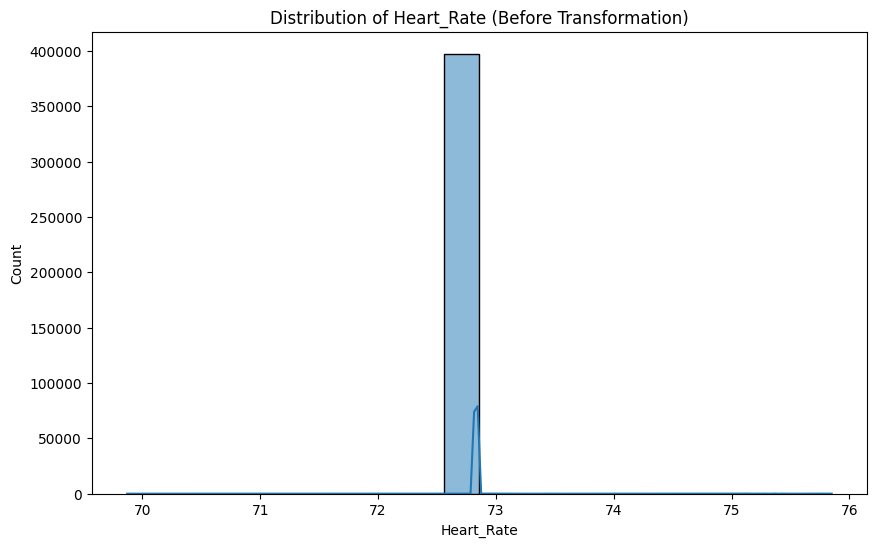

C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\3484133557.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[most_skewed_column] = np.log1p(df_cleaned[most_skewed_column])


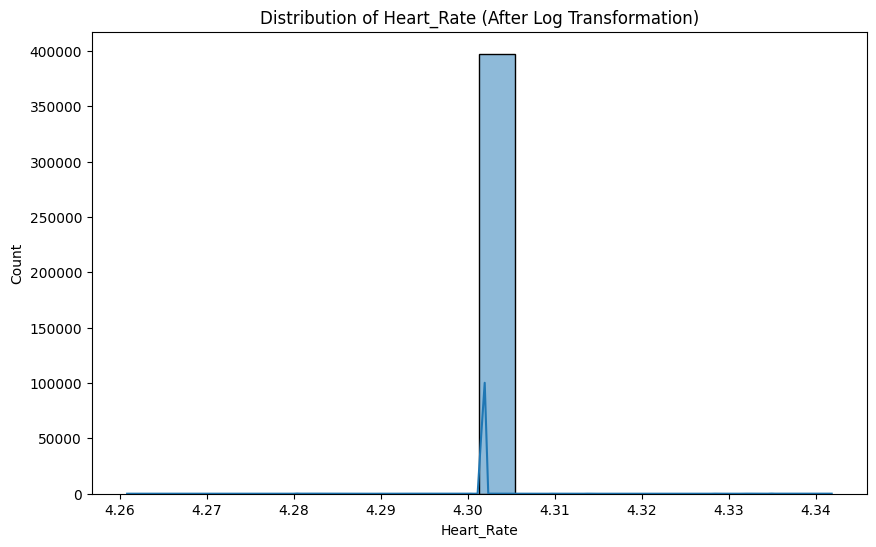


Skewness After Transformation:
12.326738040491128


In [7]:
#Address Skewed Data
import seaborn as sns
import matplotlib.pyplot as plt

# Check skewness of numerical columns
skewness = df_cleaned.select_dtypes(include=[np.number]).skew()
print("Skewness of Numerical Columns:")
print(skewness)

# Plot distribution of a skewed column (e.g., the most skewed column)
most_skewed_column = skewness.idxmax()
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[most_skewed_column], kde=True)
plt.title(f"Distribution of {most_skewed_column} (Before Transformation)")
plt.show()

# Apply log transformation to the most skewed column
df_cleaned[most_skewed_column] = np.log1p(df_cleaned[most_skewed_column])

# Plot distribution after transformation
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[most_skewed_column], kde=True)
plt.title(f"Distribution of {most_skewed_column} (After Log Transformation)")
plt.show()

# Check skewness after transformation
print("\nSkewness After Transformation:")
print(df_cleaned[most_skewed_column].skew())

##### Checking data types of column

In [8]:
print("Column Data Types:")
print(df.dtypes)

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display results
print("\nNumerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Column Data Types:
ACCELEROMETER_Y           float64
ACCELEROMETER_X           float64
ACCELEROMETER_Z           float64
Heart_Rate                float64
Electro dermal actvity    float64
Blood Volume Pulse        float64
INTERBEAT INTERVAL        float64
IBI_Mean                  float64
Temperature               float64
dtype: object

Numerical Columns:
Index(['ACCELEROMETER_Y', 'ACCELEROMETER_X', 'ACCELEROMETER_Z', 'Heart_Rate',
       'Electro dermal actvity', 'Blood Volume Pulse', 'INTERBEAT INTERVAL',
       'IBI_Mean', 'Temperature'],
      dtype='object')

Categorical Columns:
Index([], dtype='object')


## Exploratory Data Analysis

##### Step where the selected dataset is represented visually after handling outliers and skewness

#### Histogram


Histograms:


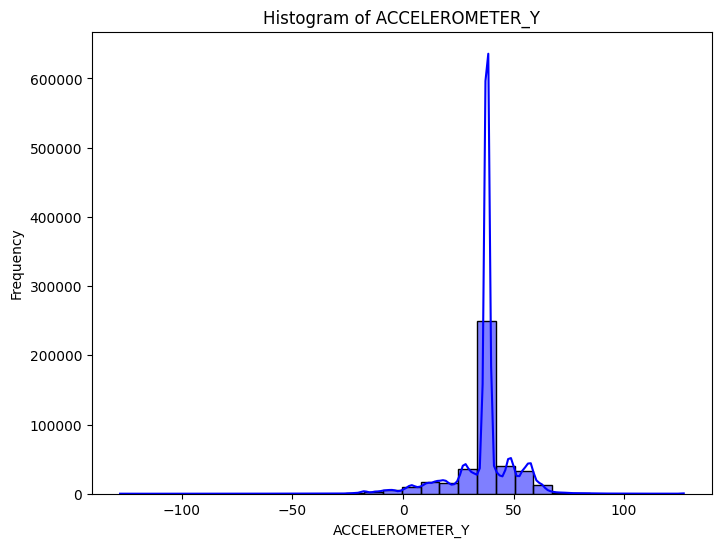

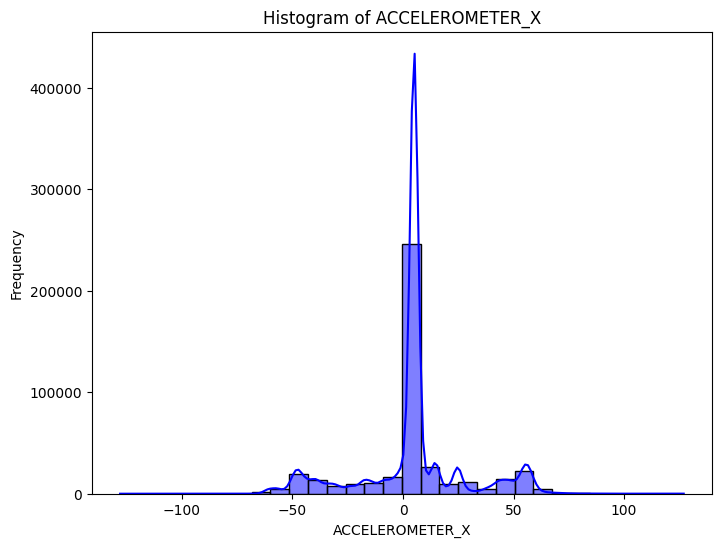

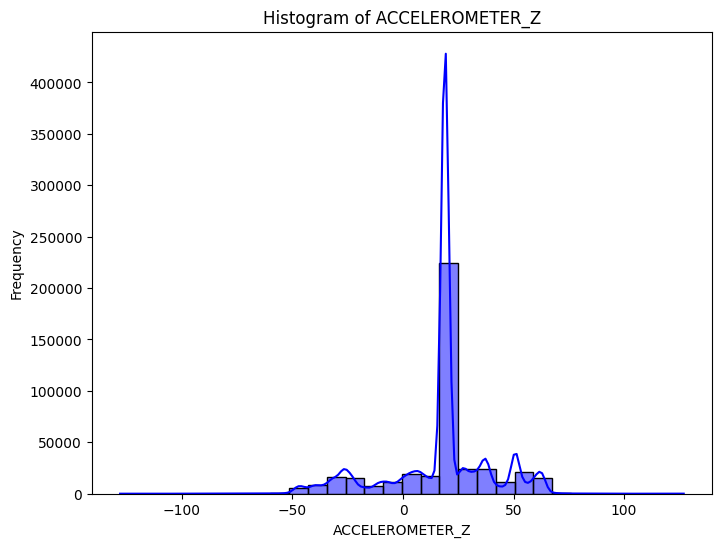

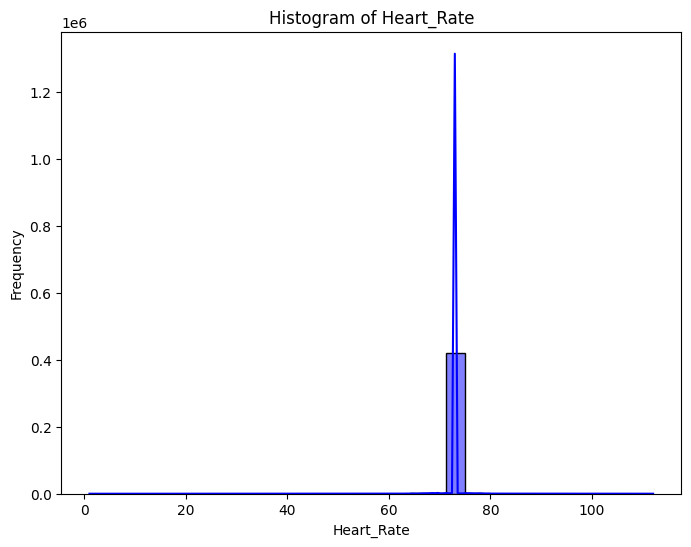

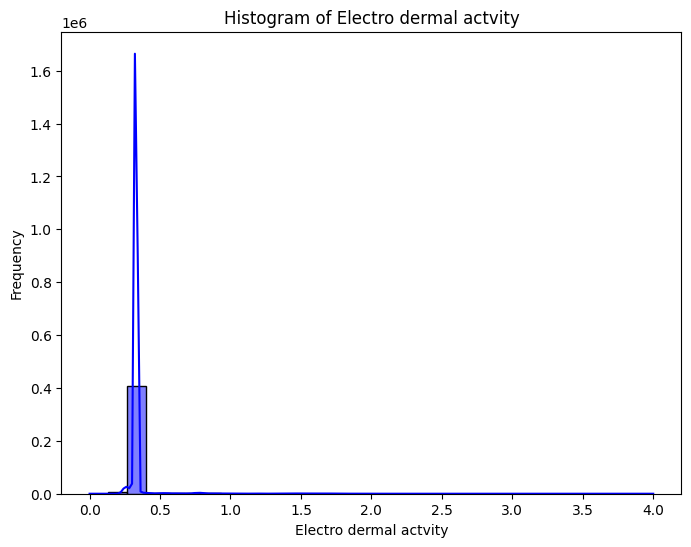

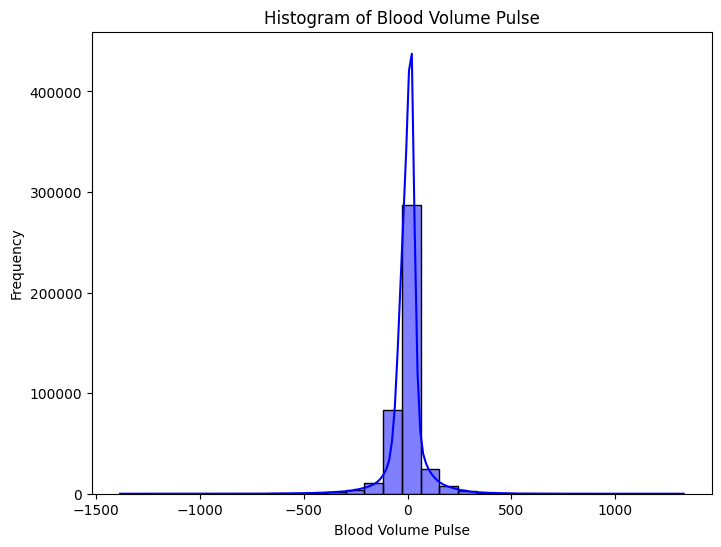

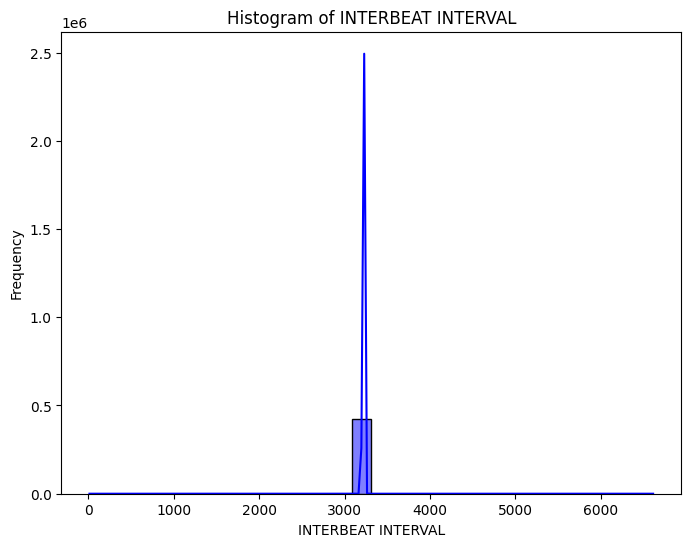

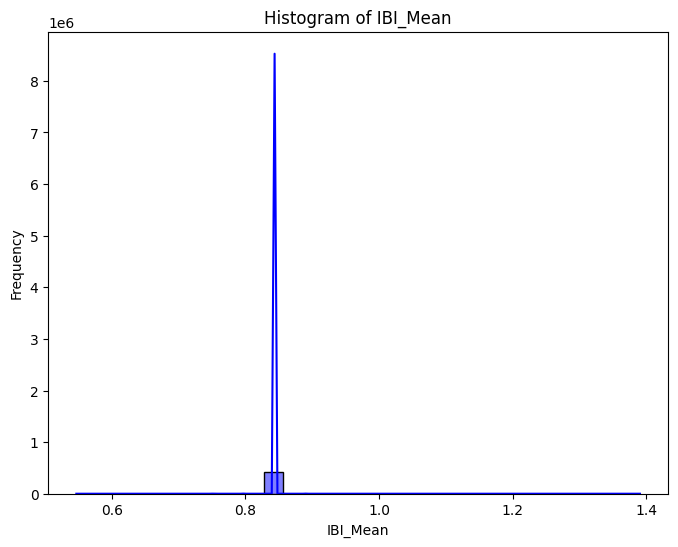

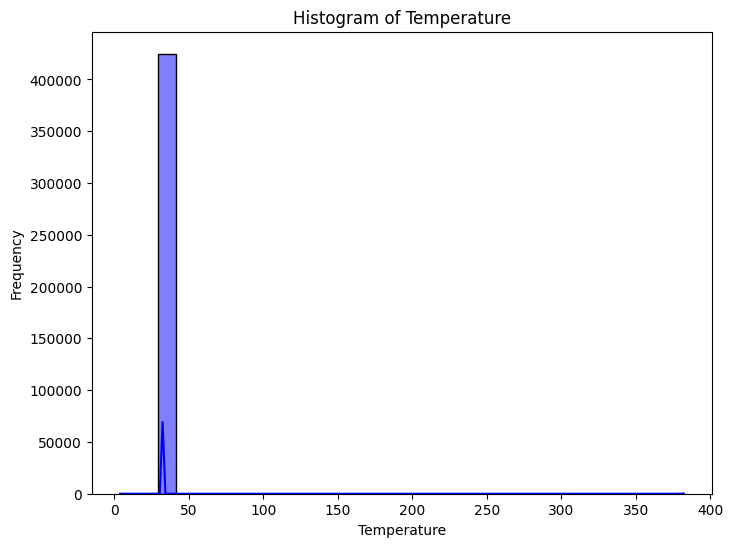

In [9]:
# Histogram for each numerical column
print("\nHistograms:")
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#### Boxplot


Boxplots:


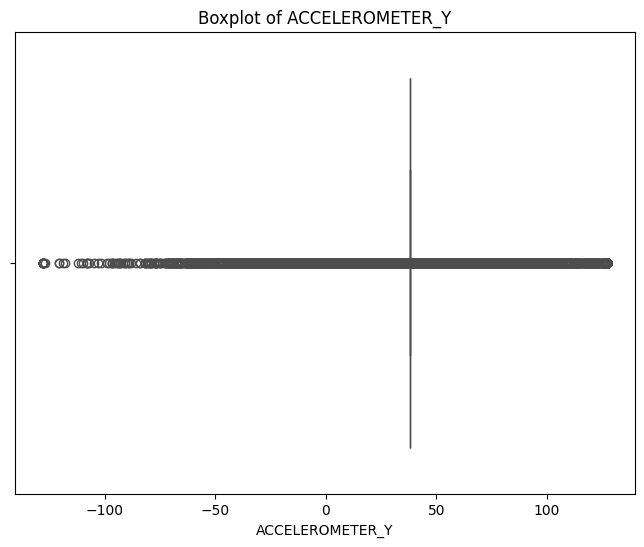

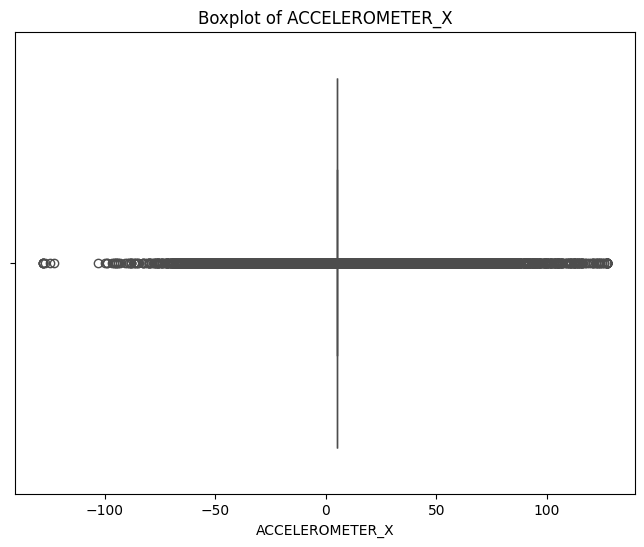

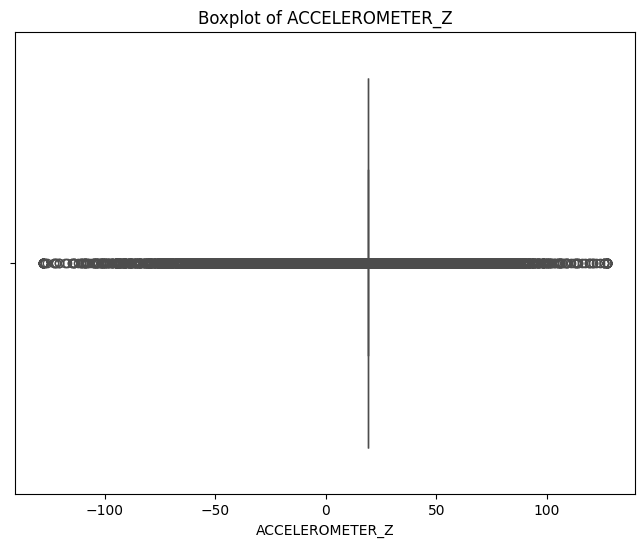

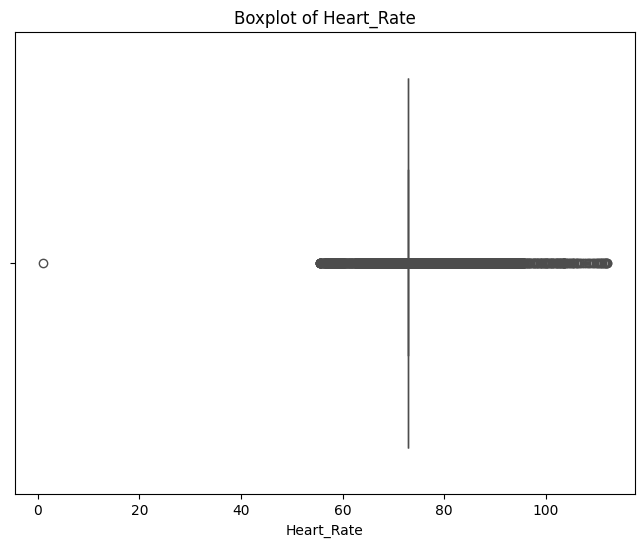

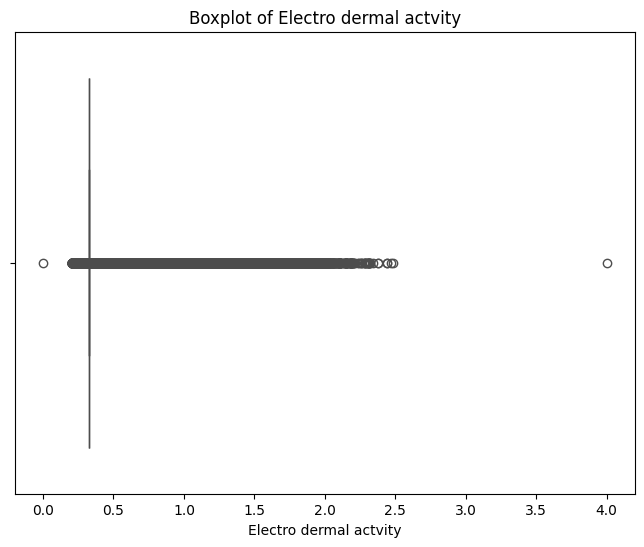

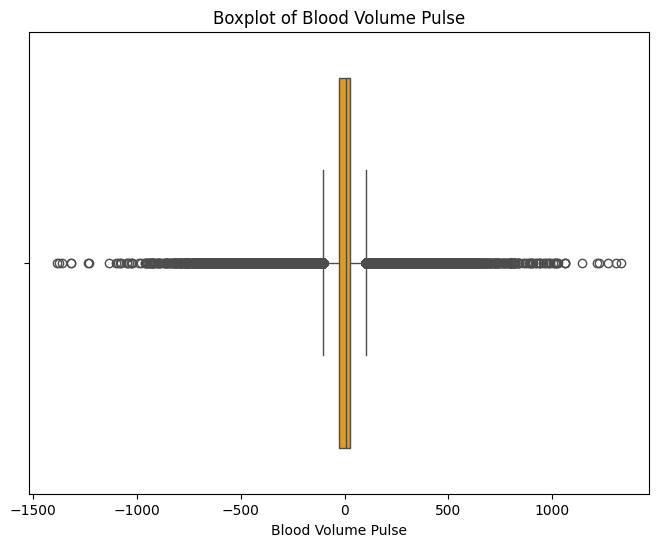

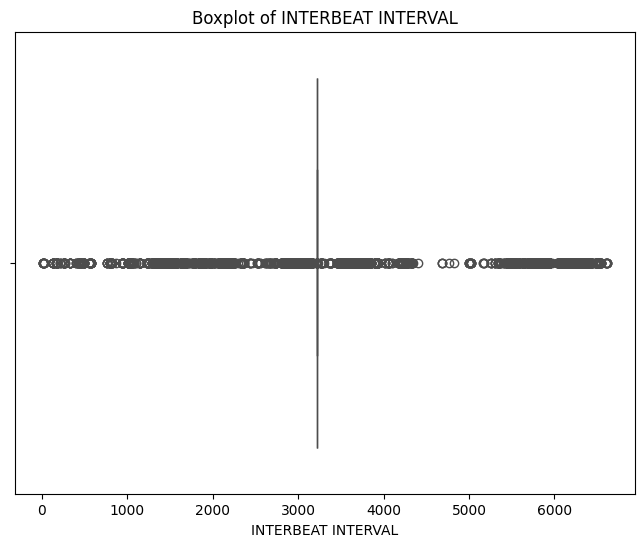

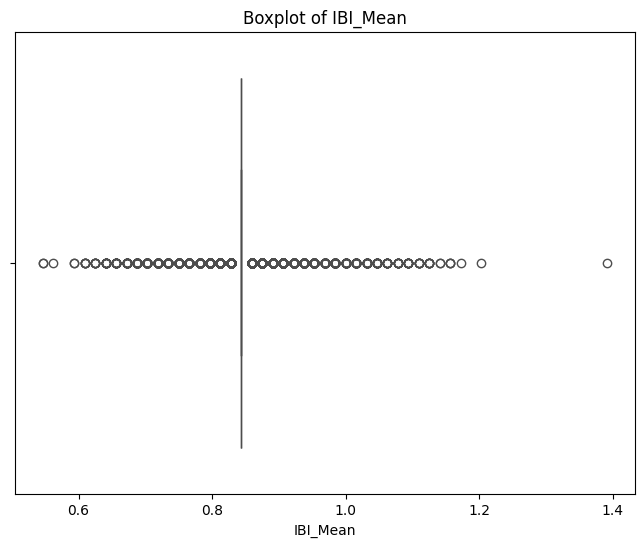

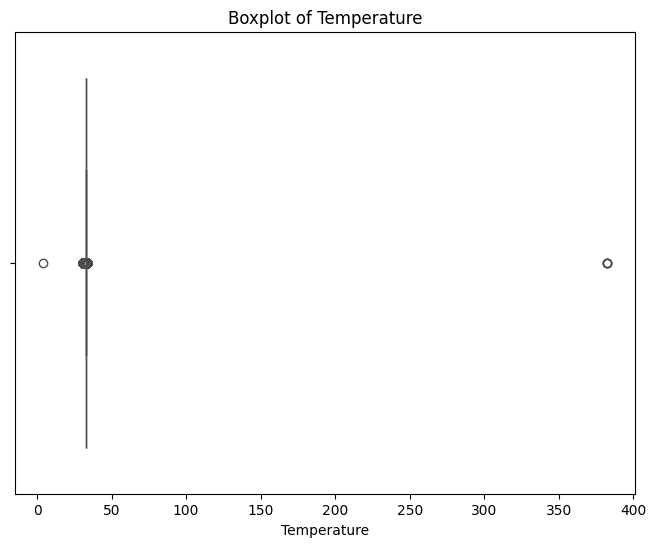

In [10]:
# Boxplot for each numerical column
print("\nBoxplots:")
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

#### Pair Plot


Pair Plot:


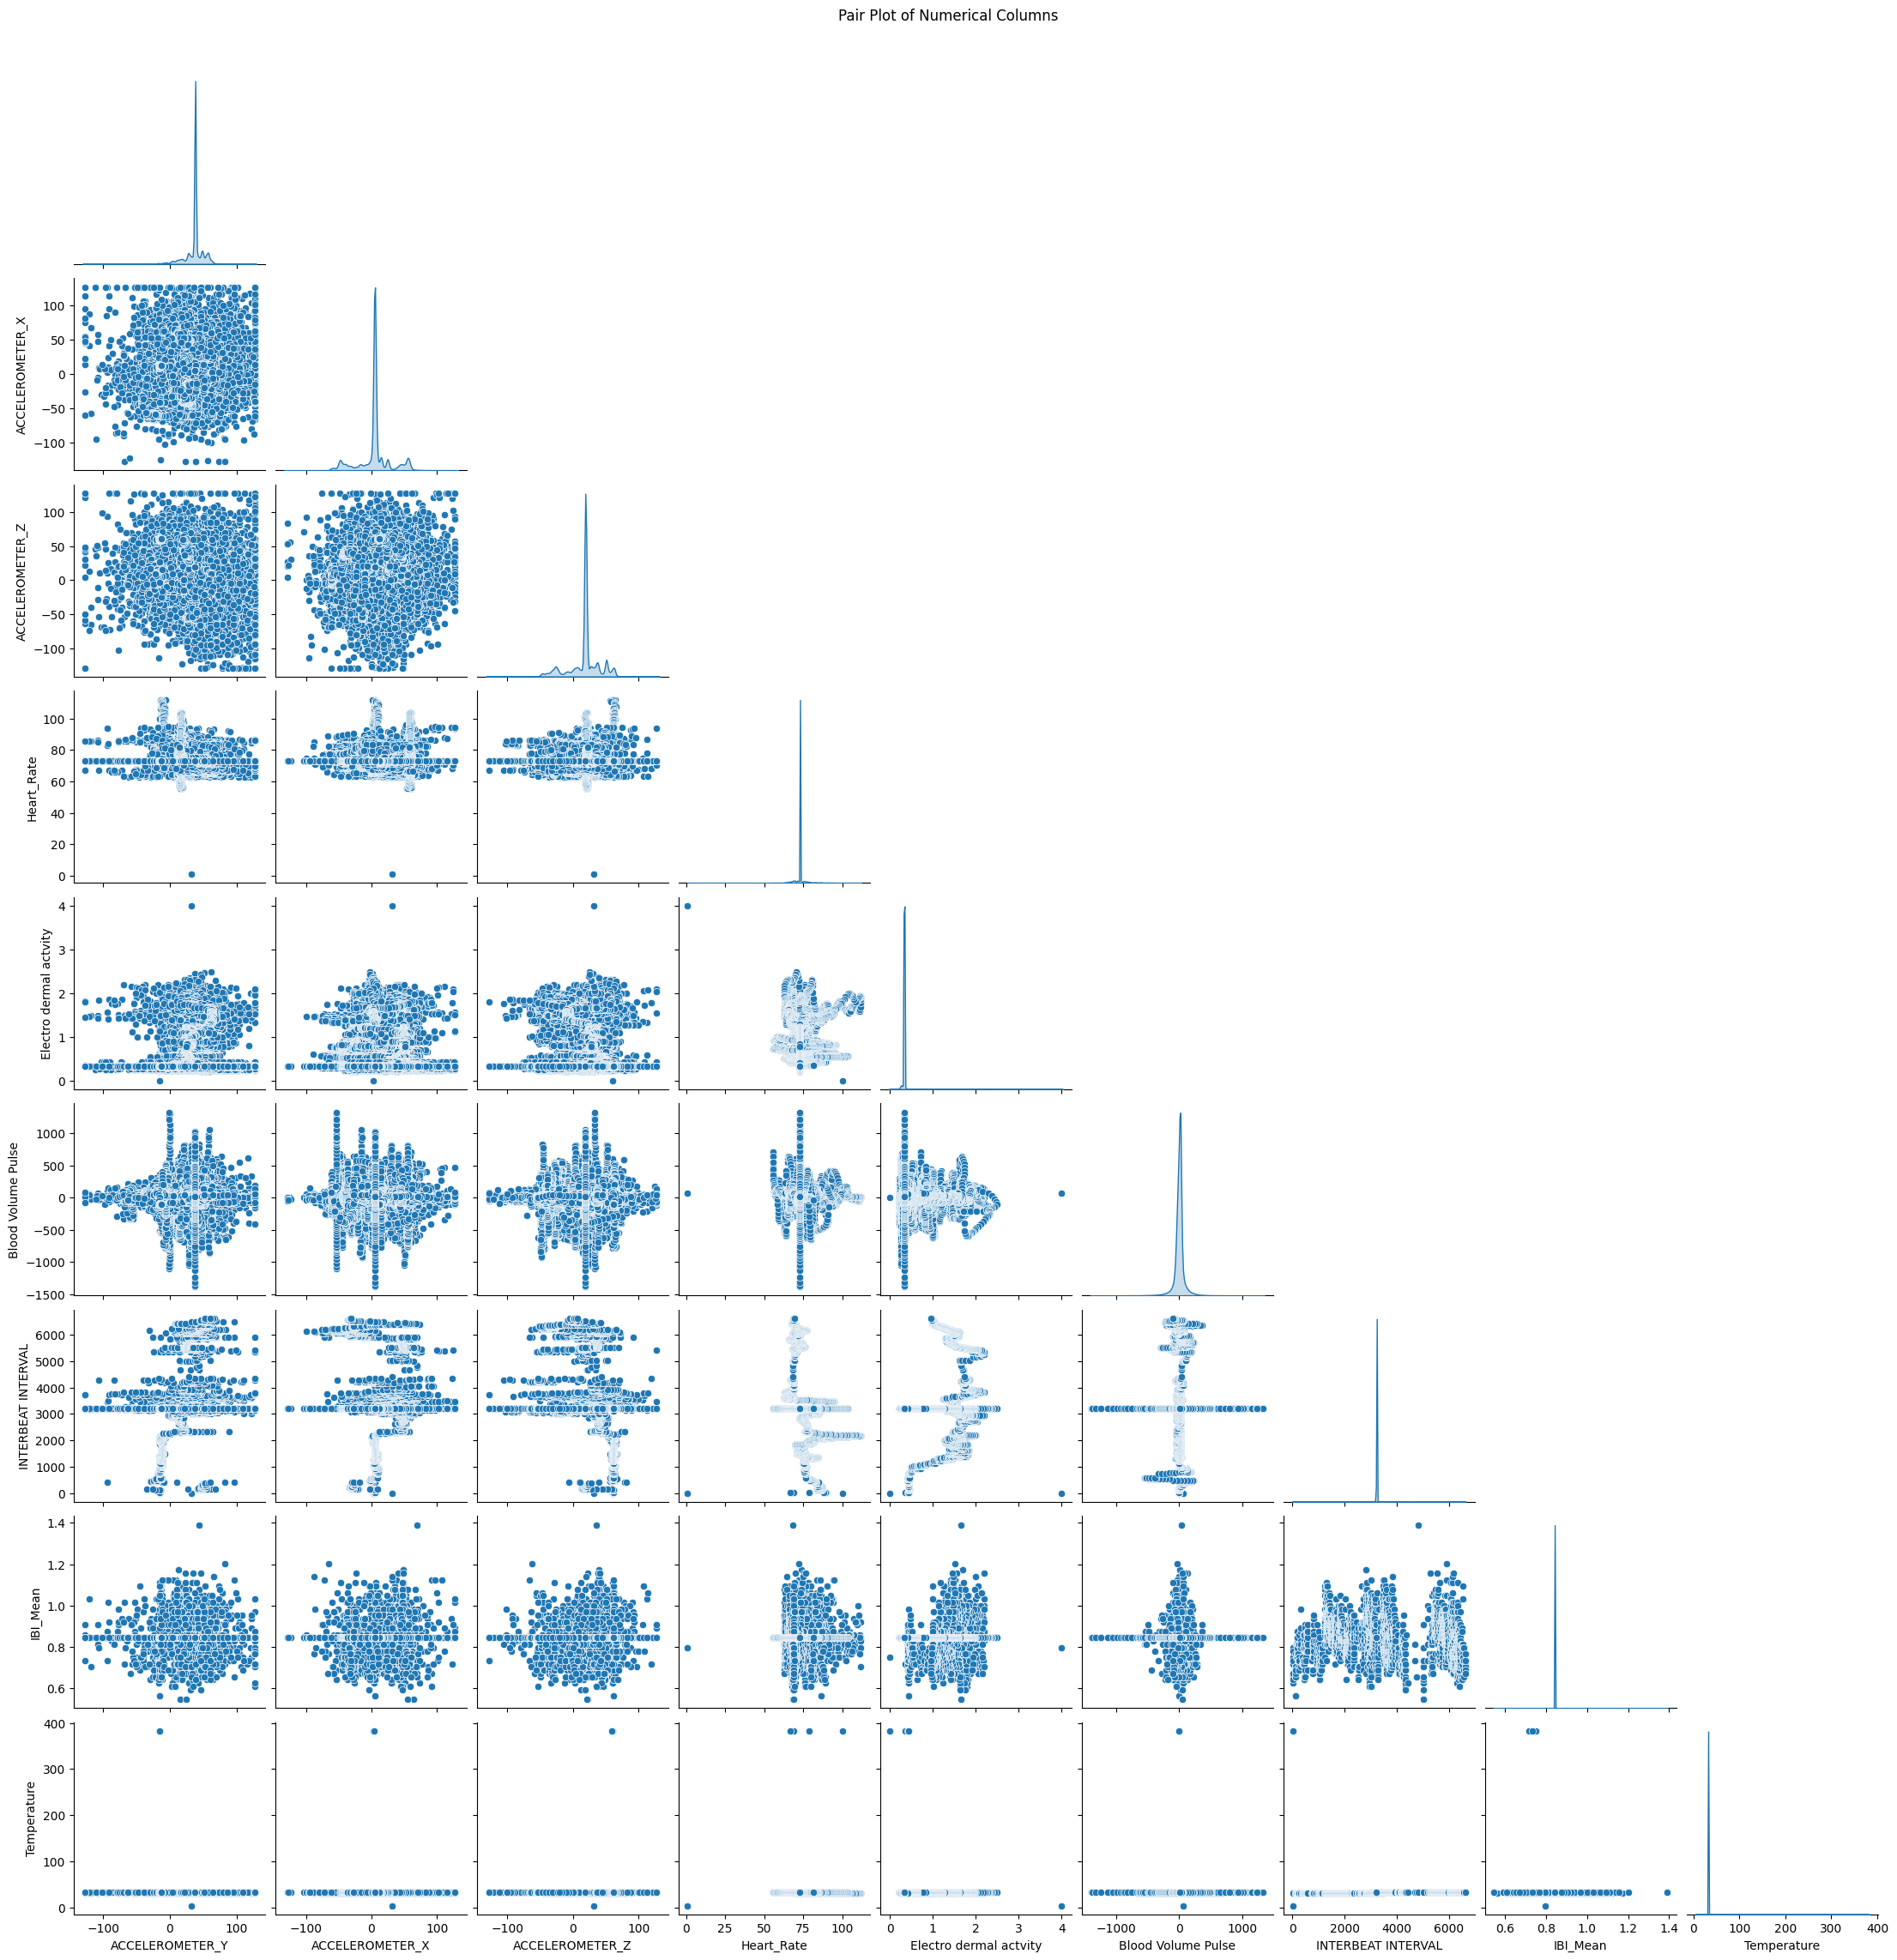

In [11]:
# Pair Plot for all numerical columns
print("\nPair Plot:")
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()

#### Heatmap Correlation


Heatmap Correlation:


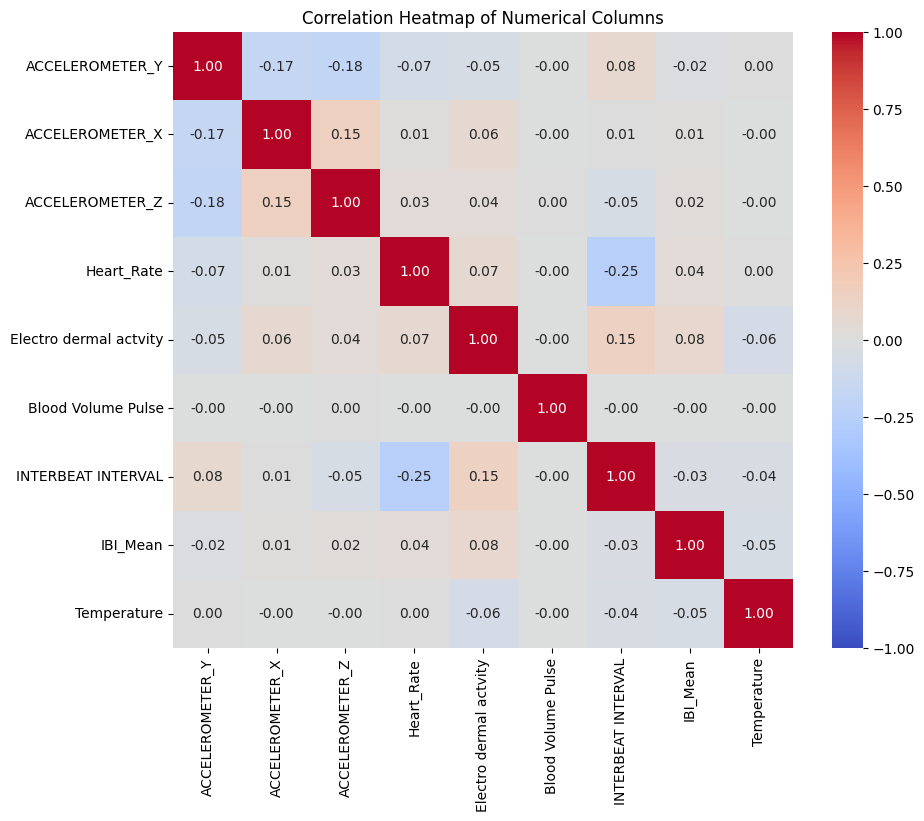

In [12]:
# Heatmap Correlation
print("\nHeatmap Correlation:")
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

#### Pie Diagram


Pie Diagram:


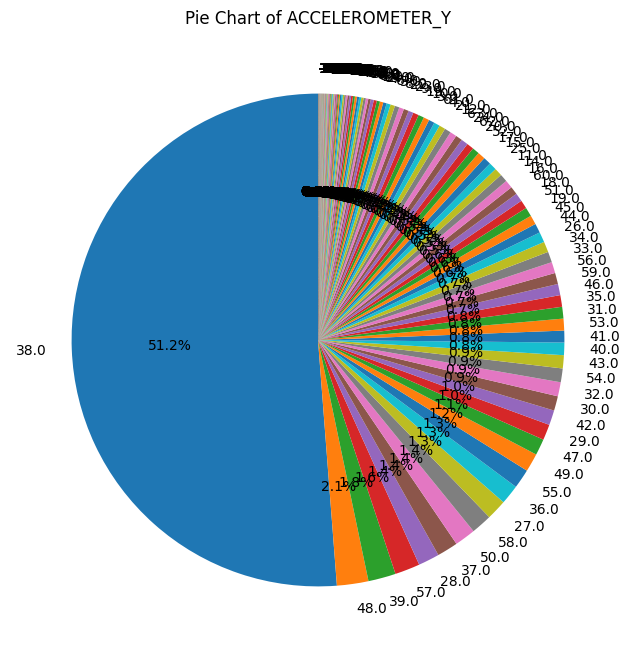

In [13]:
print("\nPie Diagram:")
col = numerical_columns[0]  
plt.figure(figsize=(8, 8))
df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title(f"Pie Chart of {col}")
plt.ylabel("")
plt.show()

#### Bar Plot


Bar Plot:


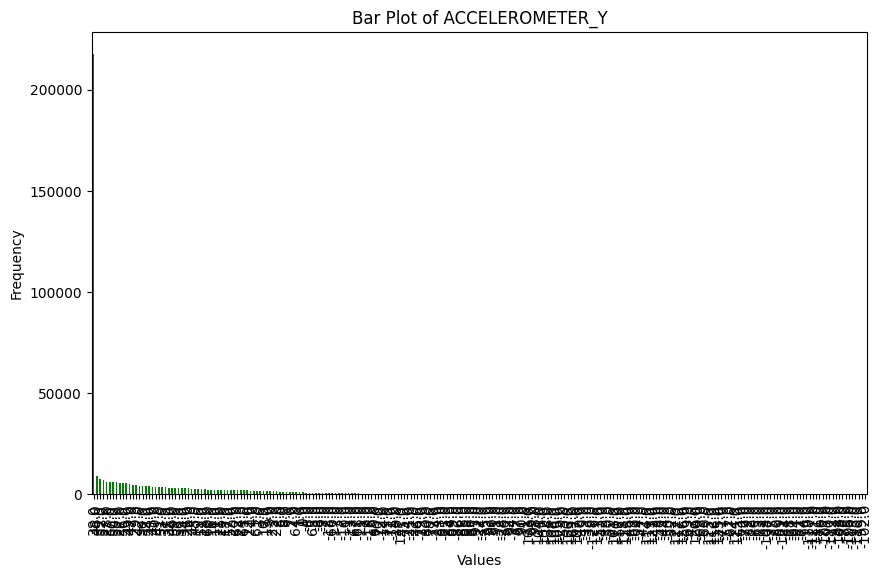

In [14]:
print("\nBar Plot:")
col = numerical_columns[0]  # Use the first numerical column
plt.figure(figsize=(10, 6))
df[col].value_counts().plot.bar(color='green')
plt.title(f"Bar Plot of {col}")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

#### Count Plot


Count Plot:


C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\3697656291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


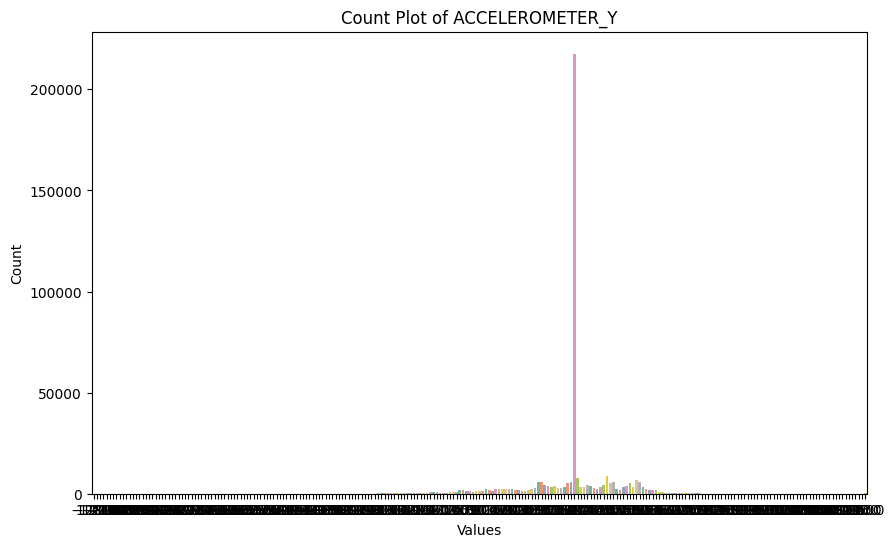

In [15]:
print("\nCount Plot:")
col = numerical_columns[0]  # Use the first numerical column
plt.figure(figsize=(10, 6))
sns.countplot(x=df[col], palette="Set2")
plt.title(f"Count Plot of {col}")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()

#### Line Plot


Line Plot:


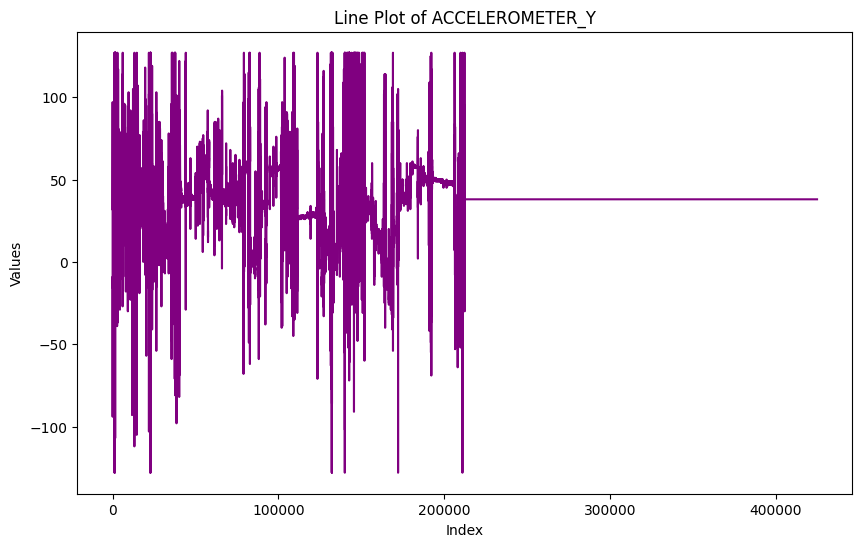

In [16]:
print("\nLine Plot:")
col = numerical_columns[0] 
plt.figure(figsize=(10, 6))
df[col].plot(kind="line", color='purple')
plt.title(f"Line Plot of {col}")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

#### KDE Plots(Kernal Density Plot)


Kernel Density Estimation (KDE):


C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\1953492909.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='red')


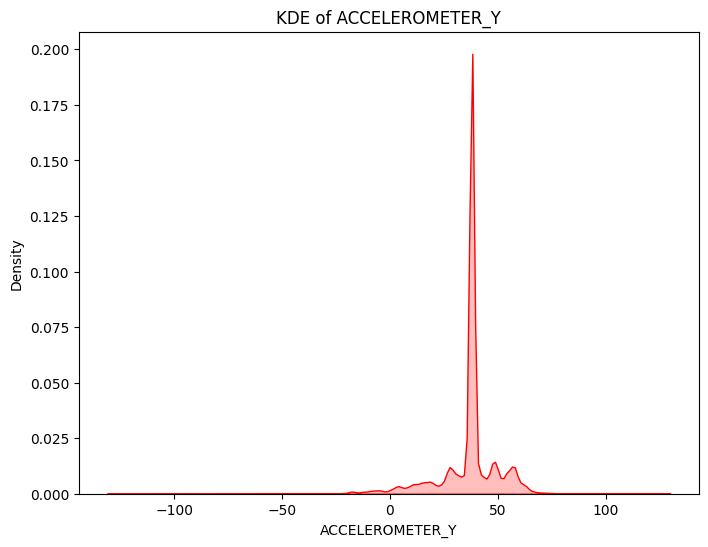

C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\1953492909.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='red')


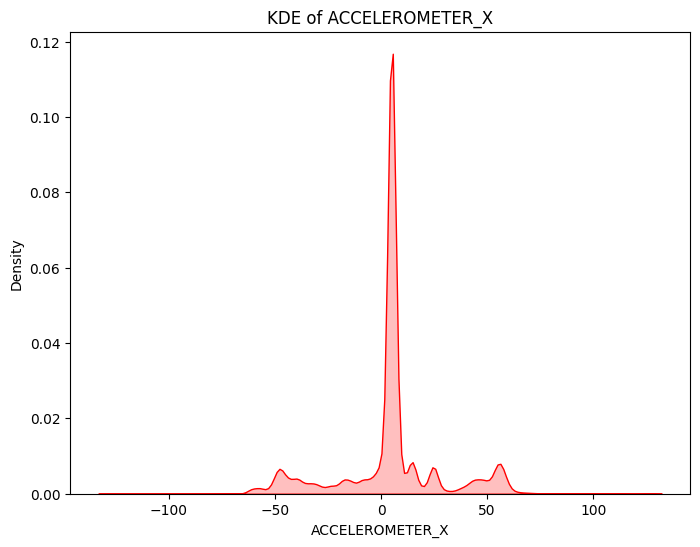

C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\1953492909.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='red')


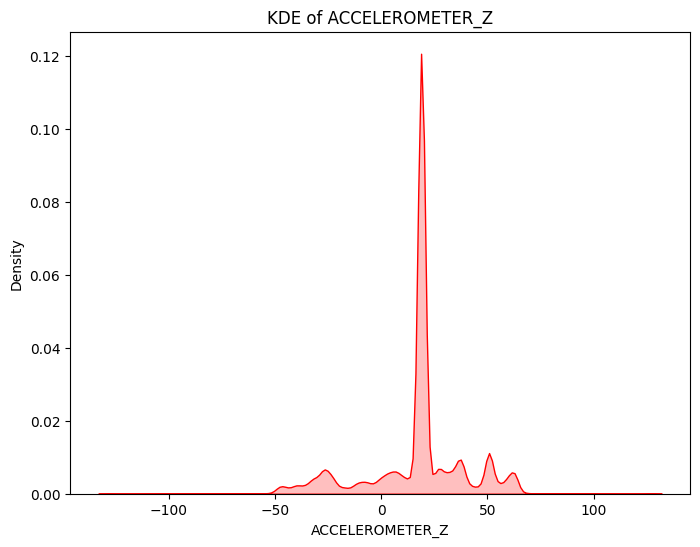

C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\1953492909.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='red')


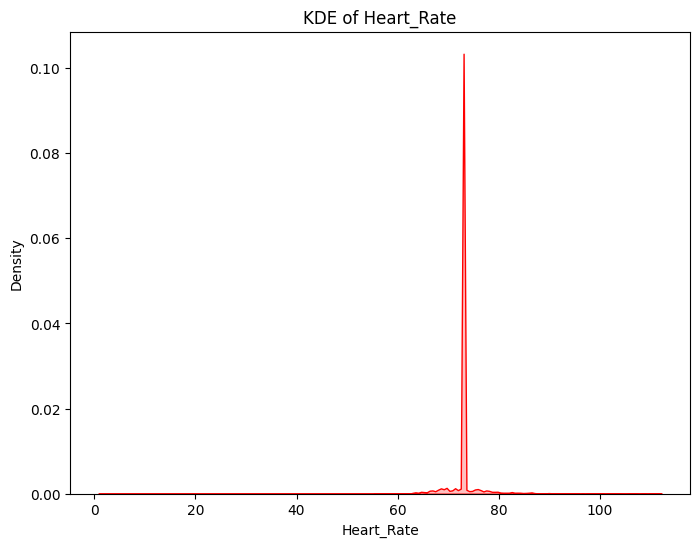

C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\1953492909.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='red')


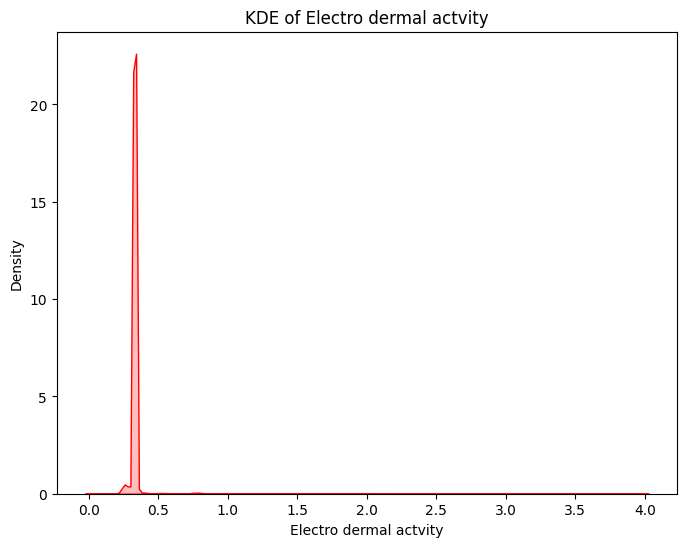

C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\1953492909.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='red')


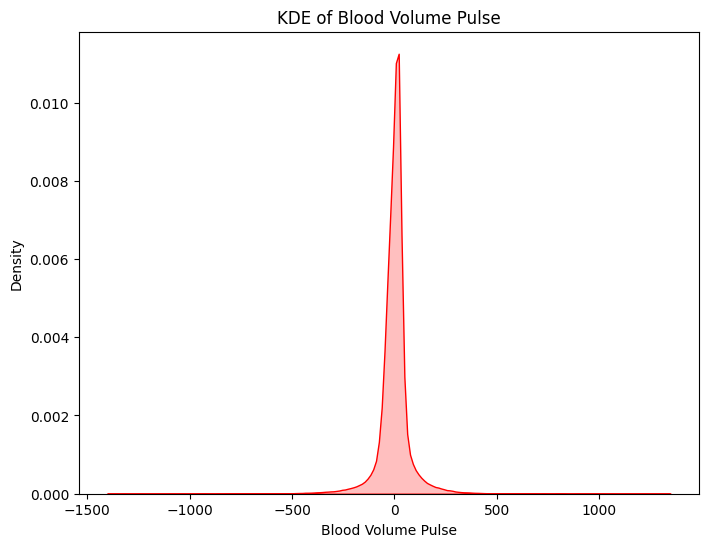

C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\1953492909.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='red')


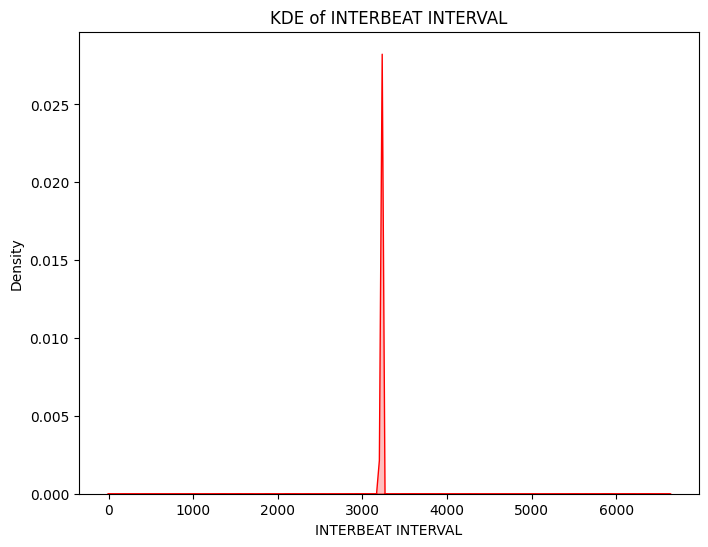

C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\1953492909.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='red')


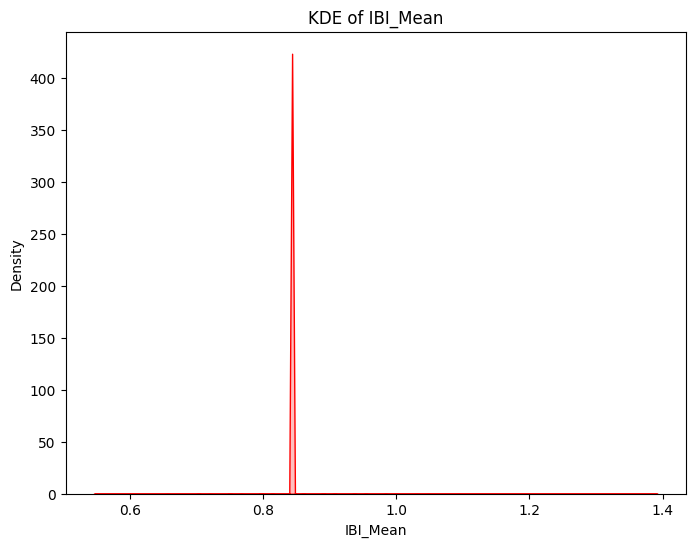

C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\1953492909.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='red')


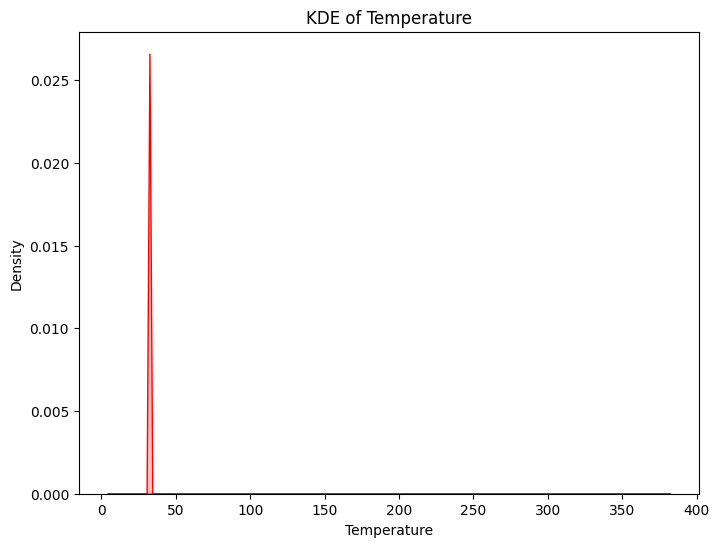

In [17]:
# KDE for each numerical column
print("\nKernel Density Estimation (KDE):")
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[col], shade=True, color='red')
    plt.title(f"KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

##### Based on the dataset, HR_1499685050.000000 (heart rate) or EDA_1499685040.000000 (electrodermal activity) are likely candidates for the target column, depending on the problem context. If you're working on a health-related problem, heart rate is often a key target variable. If you're analyzing stress or emotions, EDA will be the target.

#### Identifying Target Column

In [18]:
target_column = 'Heart_Rate'  
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Display the first few rows of the target column
print("Target Column (First 5 Rows):")
print(y.head())

Target Column (First 5 Rows):
0      1.0
1    100.0
2     79.0
3     69.0
4     66.5
Name: Heart_Rate, dtype: float64


## Feature Selection

#### SelectKBest

In [19]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer


target_column = 'Heart_Rate'
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

X = df.drop(columns=[target_column])
y = df[target_column]

# Step 1: Handle Missing Values in the Target Columns
print(f"\nNumber of rows before dropping missing values in target column: {len(df)}")
df_cleaned = df.dropna(subset=[target_column])
print(f"Number of rows after dropping missing values in target column: {len(df_cleaned)}")


X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Step 2: Handle Missing Values in the Features
imputer = SimpleImputer(strategy='median')  
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Check for missing values after imputation
print("\nMissing Values After Handling:")
print(X_imputed.isnull().sum())

# Step 3: Apply SelectKBest
k = 5  
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_imputed, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("\nTop {} features selected by SelectKBest:".format(k))
print(selected_features)


Number of rows before dropping missing values in target column: 424865
Number of rows after dropping missing values in target column: 424865

Missing Values After Handling:
ACCELEROMETER_Y           0
ACCELEROMETER_X           0
ACCELEROMETER_Z           0
Electro dermal actvity    0
Blood Volume Pulse        0
INTERBEAT INTERVAL        0
IBI_Mean                  0
Temperature               0
dtype: int64

Top 5 features selected by SelectKBest:
Index(['ACCELEROMETER_Y', 'ACCELEROMETER_Z', 'Electro dermal actvity',
       'INTERBEAT INTERVAL', 'IBI_Mean'],
      dtype='object')


#### Random Forest Regressor


Feature Importance Scores:
                  Feature  Importance
5      INTERBEAT INTERVAL    0.337578
3  Electro dermal actvity    0.287553
7             Temperature    0.261177
4      Blood Volume Pulse    0.050578
1         ACCELEROMETER_X    0.029196
2         ACCELEROMETER_Z    0.022724
0         ACCELEROMETER_Y    0.010778
6                IBI_Mean    0.000416


C:\Users\VARKEY JOSHY T\AppData\Local\Temp\ipykernel_13216\321910343.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


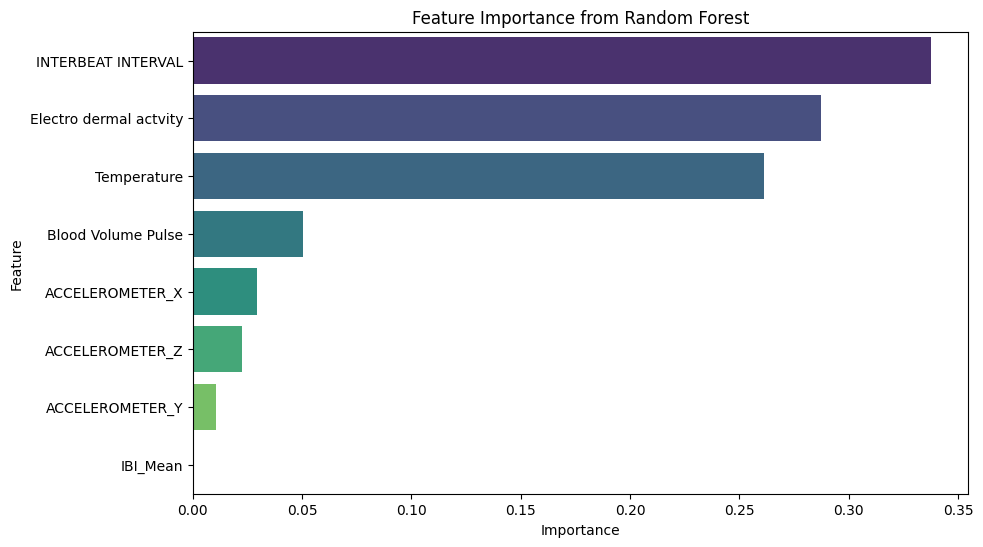

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


# Display feature importance
print("\nFeature Importance Scores:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.show()

## Spliting Data Into Training And Testing Set

In [21]:
from sklearn.model_selection import train_test_split

# Check for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_columns)


target_column = 'Heart_Rate'  
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("\nShapes of the resulting datasets:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Display the first few rows of the training and testing sets
print("\nFirst few rows of X_train:")
print(X_train.head())

print("\nFirst few rows of X_test:")
print(X_test.head())

Numerical Columns:
Index(['ACCELEROMETER_Y', 'ACCELEROMETER_X', 'ACCELEROMETER_Z', 'Heart_Rate',
       'Electro dermal actvity', 'Blood Volume Pulse', 'INTERBEAT INTERVAL',
       'IBI_Mean', 'Temperature'],
      dtype='object')

Shapes of the resulting datasets:
X_train: (339892, 8)
X_test: (84973, 8)
y_train: (339892,)
y_test: (84973,)

First few rows of X_train:
        ACCELEROMETER_Y  ACCELEROMETER_X  ACCELEROMETER_Z  \
334340             38.0              5.0             19.0   
314134             38.0              5.0             19.0   
246650             38.0              5.0             19.0   
227957             38.0              5.0             19.0   
145547             45.0              9.0             63.0   

        Electro dermal actvity  Blood Volume Pulse  INTERBEAT INTERVAL  \
334340                0.329034               24.56          3220.58492   
314134                0.329034               -5.21          3220.58492   
246650                0.329034           

## Feature Scaling

#### MinMax Scalar And Standard Scaler

##### This particular codeblock contains scaling of dataset using both i.e minmax and standard scalar.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separate features (X) and target (y)
target_column = 'Heart_Rate'  
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the training set before scaling
print("\nTraining Set Before Scaling:")
print(X_train.head())

# 1. Min-Max Scaling
print("\nApplying Min-Max Scaling...")
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X_test.columns)

# Display the first few rows of the training set after Min-Max scaling
print("\nTraining Set After Min-Max Scaling:")
print(X_train_minmax.head())

# 2. Standardization
print("\nApplying Standardization...")
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_standard = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_test_standard = pd.DataFrame(X_test_standard, columns=X_test.columns)

# Display the first few rows of the training set after Standardization
print("\nTraining Set After Standardization:")
print(X_train_standard.head())


Training Set Before Scaling:
        ACCELEROMETER_Y  ACCELEROMETER_X  ACCELEROMETER_Z  \
334340             38.0              5.0             19.0   
314134             38.0              5.0             19.0   
246650             38.0              5.0             19.0   
227957             38.0              5.0             19.0   
145547             45.0              9.0             63.0   

        Electro dermal actvity  Blood Volume Pulse  INTERBEAT INTERVAL  \
334340                0.329034               24.56          3220.58492   
314134                0.329034               -5.21          3220.58492   
246650                0.329034               39.02          3220.58492   
227957                0.329034                8.39          3220.58492   
145547                0.329034               24.19          3220.58492   

        IBI_Mean  Temperature  
334340  0.843789        32.89  
314134  0.843789        32.89  
246650  0.843789        32.89  
227957  0.843789        32.89 

##### This code block contain only Standard Scaler as it is less sensitive to outliers.

In [23]:
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

#Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
    
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    
print("\nFeature Scaling Applied:")
print("Scaled DataFrame shape:", df_scaled.shape)
print("Scaled DataFrame columns:", df_scaled.columns)


Feature Scaling Applied:
Scaled DataFrame shape: (424865, 9)
Scaled DataFrame columns: Index(['ACCELEROMETER_Y', 'ACCELEROMETER_X', 'ACCELEROMETER_Z', 'Heart_Rate',
       'Electro dermal actvity', 'Blood Volume Pulse', 'INTERBEAT INTERVAL',
       'IBI_Mean', 'Temperature'],
      dtype='object')


##### Visualisation of scaled data using pair plot

<Figure size 1000x800 with 0 Axes>

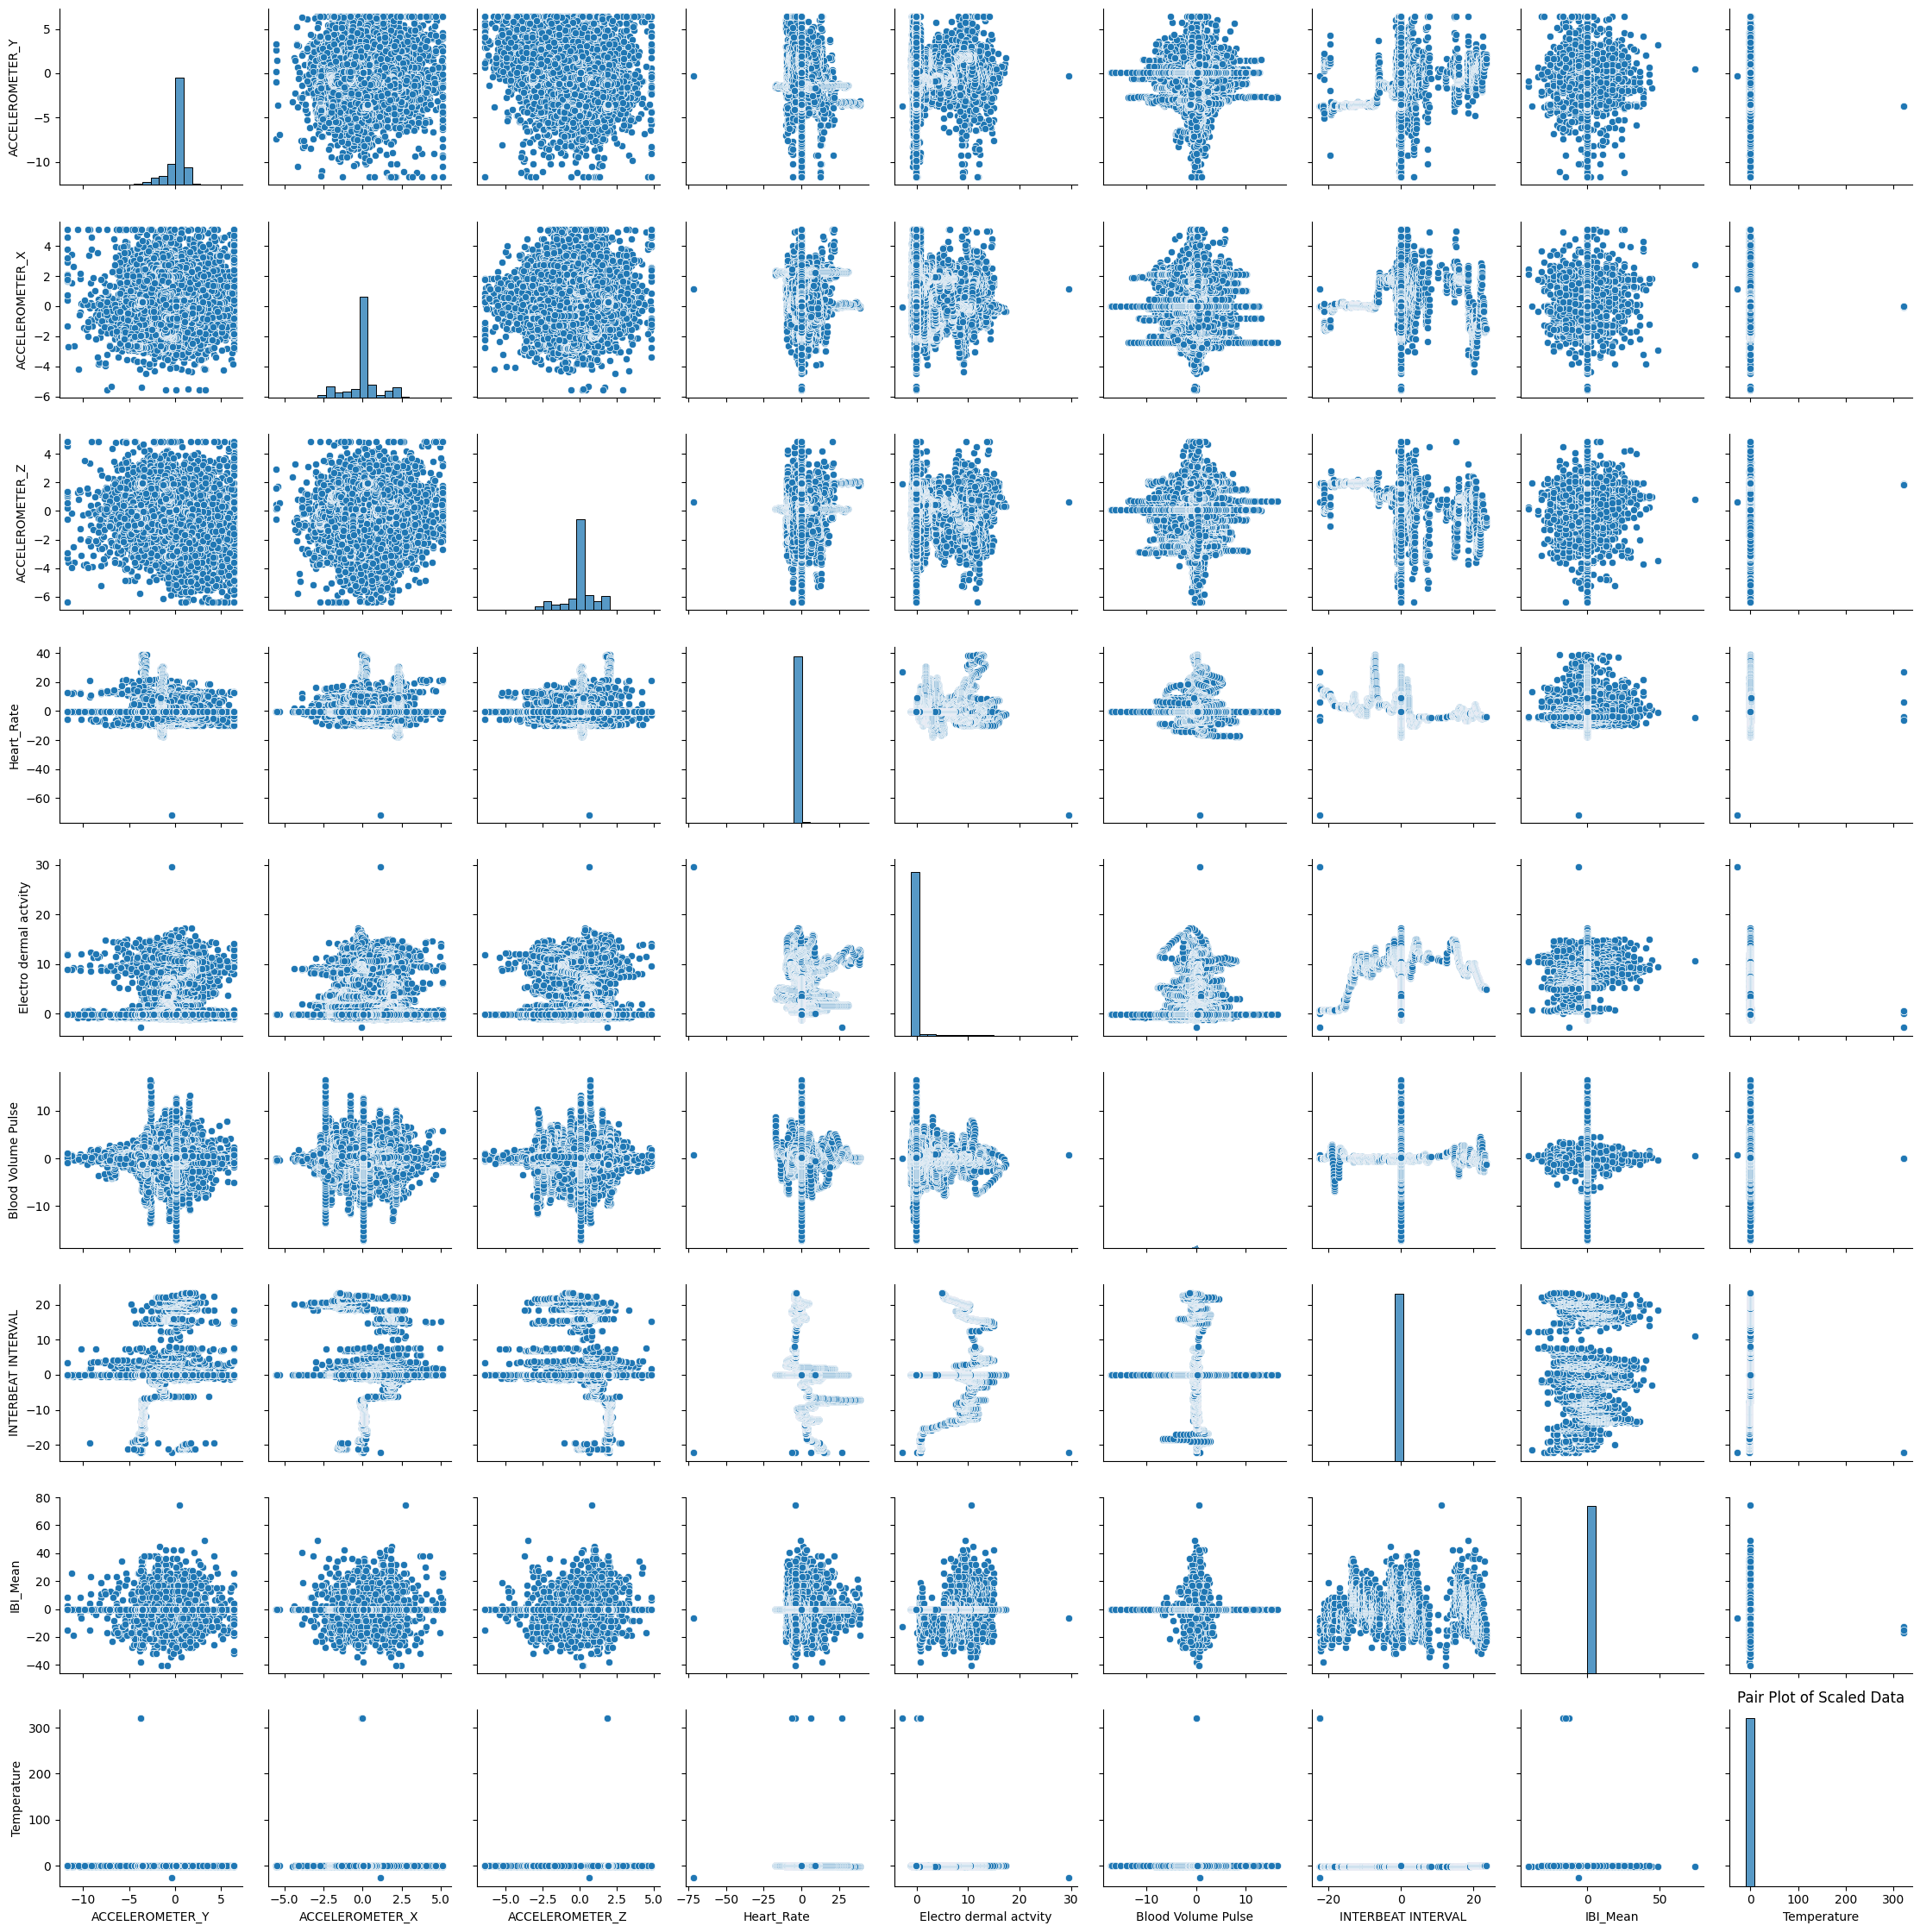

In [24]:
# Visualize scaled data
plt.figure(figsize=(10, 8))
sns.pairplot(df_scaled)
plt.title('Pair Plot of Scaled Data')
plt.tight_layout()
plt.show()

## Building ML Models

##### Here we used only Regression model because there is no categorical columns but numerical columns where the values are continuos in target column

In [25]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error


target_column = 'Heart_Rate'  
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Step 1: Handle Missing Values in `y`
# Drop rows where the target column has missing values
print(f"\nNumber of rows before dropping missing values in target column: {len(df)}")
df_cleaned = df.dropna(subset=[target_column])
print(f"Number of rows after dropping missing values in target column: {len(df_cleaned)}")

# Update X and y after dropping rows
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Step 2: Handle Missing Values in `X`
# Impute missing values with the median (for numerical columns)
imputer = SimpleImputer(strategy='median')  # You can also use 'mean' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Check for missing values after imputation
print("\nMissing Values After Handling:")
print(X_imputed.isnull().sum())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 3: Train and Evaluate Models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{model.__class__.__name__} RMSE: {rmse:.4f}")


Number of rows before dropping missing values in target column: 424865
Number of rows after dropping missing values in target column: 424865

Missing Values After Handling:
ACCELEROMETER_Y           0
ACCELEROMETER_X           0
ACCELEROMETER_Z           0
Electro dermal actvity    0
Blood Volume Pulse        0
INTERBEAT INTERVAL        0
IBI_Mean                  0
Temperature               0
dtype: int64


In [26]:
# 1. Random Forest
rf_model = RandomForestRegressor(random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test)

RandomForestRegressor RMSE: 0.1616


C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
# 2. Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
evaluate_model(gb_model, X_train, X_test, y_train, y_test)

GradientBoostingRegressor RMSE: 0.5373


C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
# 3. K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
evaluate_model(knn_model, X_train, X_test, y_train, y_test)

KNeighborsRegressor RMSE: 0.7584


C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
# 4. Support Vector Regression (SVR)
svr_model = SVR()
evaluate_model(svr_model, X_train, X_test, y_train, y_test)

SVR RMSE: 0.9467


C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
# 5. Linear Regression
lr_model = LinearRegression()
evaluate_model(lr_model, X_train, X_test, y_train, y_test)

LinearRegression RMSE: 0.9662


C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Model Evaluation

##### To understand best performing model

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train a Model (Random Forest Regressor as an example)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0096
Mean Squared Error (MSE): 0.0261
Root Mean Squared Error (RMSE): 0.1616
R² Score: 0.9742


## Hyperparameter Tuning And Pipeline

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Check for missing values
print("Missing Values Before Handling:")
print(df.isnull().sum())

# Separate features (X) and target (y)
target_column = 'Heart_Rate'
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

X = df.drop(columns=[target_column])
y = df[target_column]

# Step 1: Handle Missing Values in y
print(f"\nNumber of rows before dropping missing values in target column: {len(df)}")
df_cleaned = df.dropna(subset=[target_column])
print(f"Number of rows after dropping missing values in target column: {len(df_cleaned)}")

# Update X and y after dropping rows
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the Pipeline with median imputation
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Using median strategy explicitly
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

# Step 3: Define the Hyperparameter Grid
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', None]
}

# Step 4: Perform Grid Search
print("\nPerforming Grid Search...")
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters from Grid Search:")
print(best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("\nBest Model Evaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Missing Values Before Handling:
ACCELEROMETER_Y           0
ACCELEROMETER_X           0
ACCELEROMETER_Z           0
Heart_Rate                0
Electro dermal actvity    0
Blood Volume Pulse        0
INTERBEAT INTERVAL        0
IBI_Mean                  0
Temperature               0
dtype: int64

Number of rows before dropping missing values in target column: 424865
Number of rows after dropping missing values in target column: 424865

Performing Grid Search...

Best Hyperparameters from Grid Search:
{'model__max_depth': 30, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}

Best Model Evaluation Metrics:
RMSE: 0.1689
R² Score: 0.9718


### Saving and Loading The Model

In [33]:
import joblib 
model_filename = 'Trained_model.joblib'
joblib.dump(Pipeline, model_filename)
print(f"\nModel saved to {model_filename}")


Model saved to Trained_model.joblib


In [35]:
loaded_model = joblib.load(model_filename)

### Conclusion

##### WESAD, a multimodal dataset for wearable stressand affect detection. In contrast to other available datasets, WESAD features all physiological modalities commonly integrated incommercial and medical devices: blood volume pulse (BVP), electrocardiogram (ECG), electrodermal activity (EDA), electromyogram(EMG), respiration (RESP), body temperature (TEMP), and three axis acceleration (ACC). By using these modalities, we hope that our dataset will enable and support the development of new affect recognition systems. The study protocol aimed at inducing three different affective states (neutral, stress, amusement). Self-reports on these states were collected from the study participants.For benchmarking, we used standard physiological and motion features and common machine learning methods. On a three-class (baseline vs. stress vs. amusement) problem we achieved classification accuracies of up to 80 %. Considering a binary classification problem (stress vs. non-stress), accuracies of up to 93 % were reached.These results should be interpreted with caution due to the limitations of WESAD, regarding the number of subjects and the lack of age and gender diversity. Nevertheless our results indicate that generalisation is possible. We also performed a detailed analysis on the importance of the two device locations as well as the different sensor modalities. Our results suggest that a chest-based device leads to the overall best classification results and by adding data of a wrist-based device no further improvement is achieved. However, the results obtained using only a wrist-based device are promising, especially considering the minimal intrusive nature of such a device.

### Future Scope

##### Exploring longer-term stress monitoring, integrating data from other sensors beyond the wrist and chest, developing more robust models for real-world applications by considering individual variations, and investigating the potential for detecting subtle emotional states beyond just stress and amusement using the multimodal data provided by the dataset

In [2]:
import os
import pandas as pd
import zipfile
from matplotlib import pyplot as plt


# Path to your ZIP file
zip_file_path = r"C:\Users\VARKEY JOSHY T\Desktop\WESAD\S6\S6_E4_Data.zip"


# Temporary folder to extract files
extract_folder = "extracted_files"

# Create a folder for extraction if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extract ZIP file
with zipfile.ZipFile(r"C:\Users\VARKEY JOSHY T\Desktop\WESAD\S6\S6_E4_Data.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List of expected CSV files in the ZIP
csv_files = ['ACC.csv', 'HR.csv', 'EDA.csv', 'BVP.csv', 'IBI.csv', 'TEMP.csv']

# Initialize a list to store DataFrames
data_frames = []
# Read and store each CSV file
for csv_file in csv_files:
    file_path = os.path.join(extract_folder, csv_file)
    if os.path.exists(file_path):  # Check if the file exists in the extracted folder
        temp_data = pd.read_csv(file_path)

        # Replace column names with the file name prefix
        file_name_without_extension = os.path.splitext(csv_file)[0]
        temp_data.columns = [f"{file_name_without_extension}_{col}" for col in temp_data.columns]

        data_frames.append(temp_data)
    else:
        print(f"Warning: {csv_file} not found in the extracted folder.")

# Combine all DataFrames side by side
merged_data = pd.concat(data_frames, axis=1)

# Display the combined table
display(merged_data) 

# Save the combined data to a CSV file
output_file = "S6_E4.csv"
merged_data.to_csv(output_file, index=False)

print(f"CSV files combined successfully into '{output_file}'")

ACC_1497439238.000000  ACC_ 1497439238.000000  \
0                        32.0                    32.0   
1                       -11.0                    -5.0   
2                       -11.0                    -5.0   
3                       -10.0                    -5.0   
4                       -11.0                    -5.0   
...                       ...                     ...   
532704                    NaN                     NaN   
532705                    NaN                     NaN   
532706                    NaN                     NaN   
532707                    NaN                     NaN   
532708                    NaN                     NaN   

        ACC_ 1497439238.000000.1  HR_1497439248.000000  EDA_1497439238.000000  \
0                           32.0                  1.00               4.000000   
1                           62.0                 60.00               0.000000   
2                           62.0                 60.00               0.505183   
3                           62.0                 61.33               0.561456   
4                           62.0                 64.75               0.567851   
...                          ...                   ...                    ...   
532704                       NaN                   NaN                    NaN   
532705                       NaN                   NaN                    NaN   
532706                       NaN                   NaN                    NaN   
532707                       NaN                   NaN                    NaN   
532708                       NaN                   NaN                    NaN   

        BVP_1497439238.00  IBI_1497439238.000000  IBI_ IBI  \
0                   64.00              17.719561  0.718783   
1                   -0.00              18.547724  0.828163   
2                   -0.00              28.845070  0.843789   
3                   -0.00              29.751362  0.906291   
4                   -0.00              30.626402  0.875040   
...                   ...                    ...       ...   
532704            -275.89                    NaN       NaN   
532705            -285.48                    NaN       NaN   
532706            -311.88                    NaN       NaN   
532707            -352.71                    NaN       NaN   
532708            -398.26                    NaN       NaN   

        TEMP_1497439238.000000  
0                         4.00  
1                       382.21  
2                       382.21  
3                       382.21  
4                       382.21  
...                        ...  
532704                     NaN  
532705                     NaN  
532706                     NaN  
532707                     NaN  
532708                     NaN  

[532709 rows x 9 columns]

CSV files combined successfully into 'S6_E4.csv'


In [4]:
df = pd.read_csv('S6_E4.csv')  

In [5]:
# Display original column names
print("Original Column Names:")
print(df.columns)

# Define a dictionary to map ALL old column names to new column names
column_mapping = {
    'ACC_1497439238.000000': 'ACCELEROMETER_X',
    'ACC_ 1497439238.000000': 'ACCELEROMETER_Y',  
    'ACC_ 1497439238.000000.1': 'ACCELEROMETER_Z',  
    'HR_1497439248.000000': 'Heart_Rate',
    'EDA_1497439238.000000': 'Electro dermal actvity',
    'BVP_1497439238.00	': 'Blood Volume Pulse',
    'IBI_1497439238.000000': 'INTERBEAT INTERVAL',
    'IBI_ IBI': 'IBI_Mean',  
    'TEMP_1497439238.000000': 'Temperature'
}

# Rename columns using the mapping dictionary
df.rename(columns=column_mapping, inplace=True)

# Display updated column names
print("\nUpdated Column Names:")
print(df.columns)

Original Column Names:
Index(['ACC_1497439238.000000', 'ACC_ 1497439238.000000',
       'ACC_ 1497439238.000000.1', 'HR_1497439248.000000',
       'EDA_1497439238.000000', 'BVP_1497439238.00', 'IBI_1497439238.000000',
       'IBI_ IBI', 'TEMP_1497439238.000000'],
      dtype='object')

Updated Column Names:
Index(['ACCELEROMETER_X', 'ACCELEROMETER_Y', 'ACCELEROMETER_Z', 'Heart_Rate',
       'Electro dermal actvity', 'BVP_1497439238.00', 'INTERBEAT INTERVAL',
       'IBI_Mean', 'Temperature'],
      dtype='object')


### Testing on Unseen Dataset

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Check for missing values
print("Missing Values Before Handling:")
print(df.isnull().sum())

# Separate features (X) and target (y)
target_column = 'Heart_Rate'  # Update this with your target column name
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Step 1: Handle Missing Values in y using median imputation
imputer_target = SimpleImputer(strategy='median')
y_imputed = imputer_target.fit_transform(y.values.reshape(-1, 1)).flatten()

# Step 2: Handle Missing Values in X using median imputation
imputer_features = SimpleImputer(strategy='median')
X_imputed = imputer_features.fit_transform(X)

# Step 3: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, 
    y_imputed, 
    test_size=0.2, 
    random_state=42
)

# Step 4: Define the Pipeline
# Use this:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler doesn't need feature_names_in
    ('model', RandomForestRegressor(random_state=42))
])

# Step 5: Train the Model
pipeline.fit(X_train, y_train)

# Step 6: Evaluate the Model on the Test Set (Unseen Data)
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation Metrics on Test Set (Unseen Data):")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 7: Save the Model (Optional)
model_filename = 'trained_model.joblib'
joblib.dump(pipeline, model_filename)
print(f"\nModel saved to {model_filename}")

# Step 8: Load the Model (Optional)
loaded_model = joblib.load(model_filename)

# Step 9: Make Predictions on Completely New, Unseen Data
new_data = pd.DataFrame({
    'ACCELEROMETER_X': [32.0, -16.0, -16.0],
    'ACCELEROMETER_Y': [32.0, 3.0, 3.0],
    'ACC_ 1497439238.000000.1': [32.0, 60.0, 60.0],
    'Electro dermal actvity': [4.0, 0.0, 0.0],
    'BVP_1497439238.00': [64.0, -0.0, -0.0],
    'IBI_1499685040.000000': [12.297438, 13.047472, 13.766255],
    'IBI_ IBI': [0.796911, 0.750034, 0.718783],
    'TEMP_1499685040.000000': [4.0, 382.21, 382.21]
})

# Make predictions on the new data
new_predictions = loaded_model.predict(new_data)
print("\nPredictions on New, Unseen Data:")
print(new_predictions)

Missing Values Before Handling:
ACCELEROMETER_X           266356
ACCELEROMETER_Y           266356
ACCELEROMETER_Z           266356
Heart_Rate                524394
Electro dermal actvity    499414
BVP_1497439238.00              0
INTERBEAT INTERVAL        529881
IBI_Mean                  529881
Temperature               499420
dtype: int64

Model Evaluation Metrics on Test Set (Unseen Data):
RMSE: 0.3099
R² Score: 0.8989

Model saved to trained_model.joblib

Predictions on New, Unseen Data:
[31.1244 56.5599 56.5248]


C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
